In [ ]:
# 📊 Customer Churn Prediction Project
This project aims to predict customer churn for a telecommunications company based on various service and demographic features. The goal is to proactively identify customers likely to leave and take preventive measures.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


In [8]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()
# Drop customer ID
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [9]:
# Encode binary and multi-class categorical variables
le = LabelEncoder()
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
multi_class_cols = [col for col in df.select_dtypes(include='object').columns if col not in binary_cols + ['Churn']]

# Label Encode binary columns
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encode multi-class columns
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# Encode target
df['Churn'] = le.fit_transform(df['Churn'])  # Yes -> 1, No -> 0


In [10]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.78708303761533
ROC AUC Score: 0.820381565010721

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[927 108]
 [192 182]]


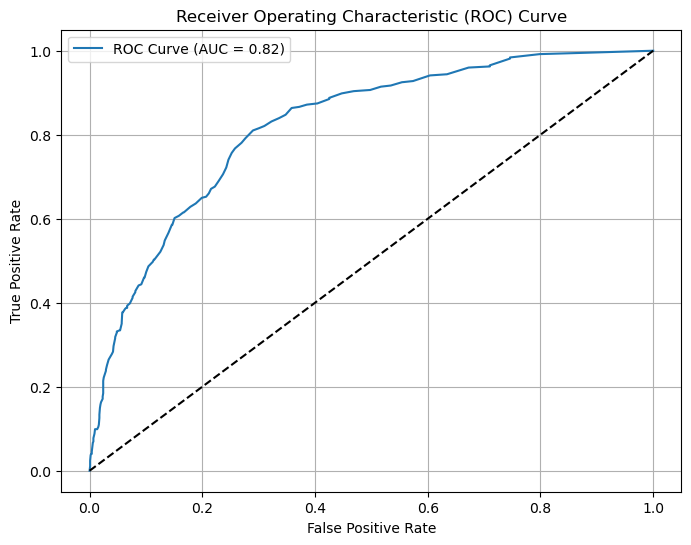

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


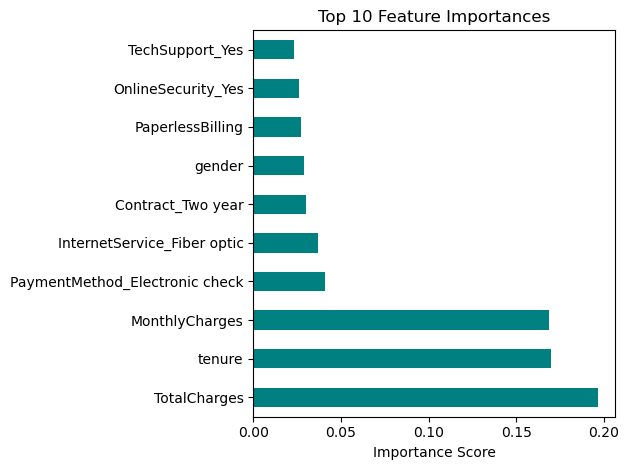

In [14]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [ ]:
Key Findings from Data Analysis
1. Churn Distribution
Around 26.5% of customers in the dataset have churned.

This indicates a class imbalance, which may affect model performance.

2. Important Features Affecting Churn
Using feature importance from the Random Forest model, the top contributors to churn are:

Contract Type: Month-to-month contracts have the highest churn.

Tenure: Customers with shorter tenure are more likely to churn.

Internet Service Type: Fiber optic users churn more than DSL users.

Monthly Charges: Higher monthly charges correlate with higher churn.

Online Security / Tech Support: Customers without these services are more likely to churn.

